In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
a = r"C:\Users\acer\Desktop\insurance_data.csv"
df= pd.read_csv(a)
df

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


In [3]:
#Load data visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
df.columns


Index(['index', 'PatientID', 'age', 'gender', 'bmi', 'bloodpressure',
       'diabetic', 'children', 'smoker', 'region', 'claim'],
      dtype='object')

In [6]:
df.head()


,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [7]:
df.shape

(1340, 11)

In [9]:
df.isnull().sum()

index            0
PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [10]:
df = df.dropna()

In [11]:
df.shape

(1332, 11)

In [12]:
df.isnull().sum()

index            0
PatientID        0
age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df = df.drop(['index','PatientID'], axis=1)
df.shape

(1332, 9)

In [15]:
df['diabetic'] = df['diabetic'].replace({'Yes': 'diabetic', 'No': 'non-diabetic'})
df['children'] = df['children'].replace({0 : 'none', 1 : 'one', 2:'two', 3:'three', 4:'four', 5:'five', 6:'six'})
df['smoker'] = df['smoker'].replace({'Yes': 'smoker', 'No': 'non-smoker'})

In [17]:
df.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.0,male,23.2,91,diabetic,none,non-smoker,southeast,1121.87
1,24.0,male,30.1,87,non-diabetic,none,non-smoker,southeast,1131.51
7,19.0,male,41.1,100,non-diabetic,none,non-smoker,northwest,1146.80
8,20.0,male,43.0,86,non-diabetic,none,non-smoker,northwest,1149.40
9,30.0,male,53.1,97,non-diabetic,none,non-smoker,northwest,1163.46


In [18]:
age_range = [13,28,46,58,61]
labels = ['Gen Z','Millennials', 'Gen X', 'Baby Boomers']
df['age_group'] = pd.cut(df['age'], age_range,labels=labels)
ageGroup = df[['age_group', 'claim']].groupby('age_group').mean().sort_values(by="claim", ascending=True)

In [19]:
df.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_group
0,39.0,male,23.2,91,diabetic,none,non-smoker,southeast,1121.87,Millennials
1,24.0,male,30.1,87,non-diabetic,none,non-smoker,southeast,1131.51,Gen Z
7,19.0,male,41.1,100,non-diabetic,none,non-smoker,northwest,1146.80,Gen Z
8,20.0,male,43.0,86,non-diabetic,none,non-smoker,northwest,1149.40,Gen Z
9,30.0,male,53.1,97,non-diabetic,none,non-smoker,northwest,1163.46,Millennials


In [20]:
# Create column with bmi ranges corresponding to Healthy Weight, Overweight and Obese. 

#bmi_range = [15.5,24.9,29.9,60]
bmi_range = [15.5,18.5,24.9,29.9,60]

labels = ['Underweight','Healthy Weight', 'Overweight', 'Obese']
#df['bmi_group'] = pd.cut(df['bmi'], bins=bmi_range)
df['bmi_group'] = pd.cut(df['bmi'], bmi_range, labels=labels)
bmiGroup = df[['bmi_group', 'claim']].groupby('bmi_group').mean().sort_values(by="claim", ascending=True)
#labels = ['Healthy Weight', 'Overweight', 'Obese']

In [21]:
#Create column with blood pressure ranges corresponding to Normal Blood Pressure, Elevated Blood Presure, Hypertension Stage 1 
# and Hypertension Stage 2

bloodpressure_range = [71,120,129,139,148]
labels = ['Normal Blood Pressure', 'Elevated Blood Pressure', 'Hypertension Stage 1','Hypertension Stage 2']
df['bloodpressure_group'] = pd.cut(df['bloodpressure'], bloodpressure_range, labels = labels)
bloodpressureGroup = df[['bloodpressure_group', 'claim']].groupby('bloodpressure_group').mean().sort_values(by="claim", ascending=True)

In [39]:
bloodpressureGroup

,claim
bloodpressure_group,
Normal Blood Pressure,12293.144996
Hypertension Stage 1,37002.625833
Elevated Blood Pressure,37353.906923
Hypertension Stage 2,38323.496000


In [22]:
df

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_group,bmi_group,bloodpressure_group
0,39.0,male,23.2,91,diabetic,none,non-smoker,southeast,1121.87,Millennials,Healthy Weight,Normal Blood Pressure
1,24.0,male,30.1,87,non-diabetic,none,non-smoker,southeast,1131.51,Gen Z,Obese,Normal Blood Pressure
7,19.0,male,41.1,100,non-diabetic,none,non-smoker,northwest,1146.80,Gen Z,Obese,Normal Blood Pressure
8,20.0,male,43.0,86,non-diabetic,none,non-smoker,northwest,1149.40,Gen Z,Obese,Normal Blood Pressure
9,30.0,male,53.1,97,non-diabetic,none,non-smoker,northwest,1163.46,Millennials,Obese,Normal Blood Pressure
...,...,...,...,...,...,...,...,...,...,...,...,...
1335,44.0,female,35.5,88,diabetic,none,smoker,northwest,55135.40,Millennials,Obese,Normal Blood Pressure
1336,59.0,female,38.1,120,non-diabetic,one,smoker,northeast,58571.07,Baby Boomers,Obese,Normal Blood Pressure
1337,30.0,male,34.5,91,diabetic,three,smoker,northwest,60021.40,Millennials,Obese,Normal Blood Pressure
1338,37.0,male,30.4,106,non-diabetic,none,smoker,southeast,62592.87,Millennials,Obese,Normal Blood Pressure


<Axes: title={'center': 'Claims per Region'}, ylabel='count'>

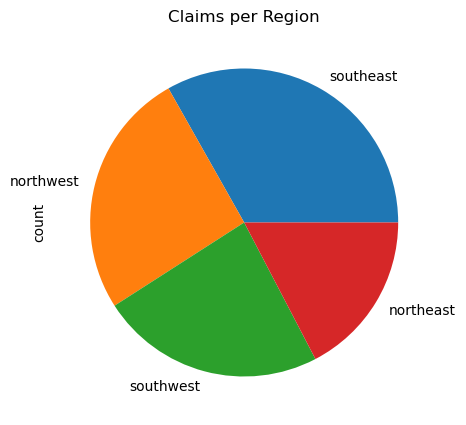

In [23]:
plt.figure(figsize = (10,5))
plt.title("Claims by Region")
df['region'].value_counts().plot(kind='pie', title = "Claims per Region")

<Axes: title={'center': 'Gender by Region'}, xlabel='gender', ylabel='count'>

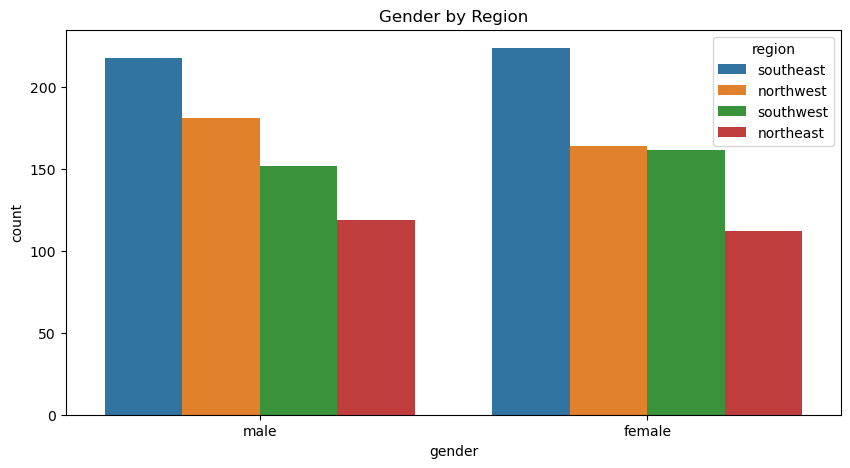

In [25]:
plt.figure(figsize = (10,5))
#plt.subplot(1,2,1)

plt.title("Gender by Region")
sns.countplot(x = 'gender', hue = 'region', data = df)

<Axes: title={'center': 'Claims per Age Group'}, ylabel='count'>

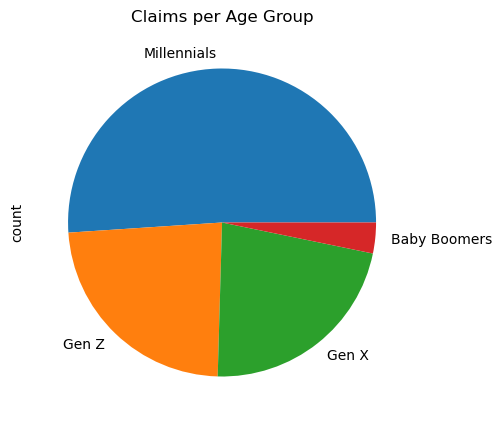

In [26]:
plt.figure(figsize = (10,5))

df['age_group'].value_counts().plot(kind='pie', title = "Claims per Age Group")

<Axes: title={'center': 'BMI Ranges'}, ylabel='count'>

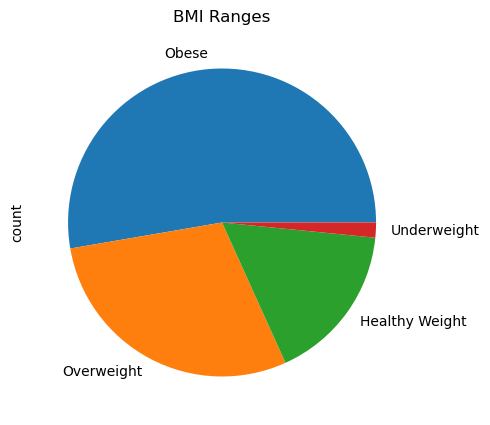

In [27]:
plt.figure(figsize = (10,5))
df['bmi_group'].value_counts().plot(kind='pie', title = "BMI Ranges")

<Axes: title={'center': 'BMI and Claim Amount'}, xlabel='bmi', ylabel='claim'>

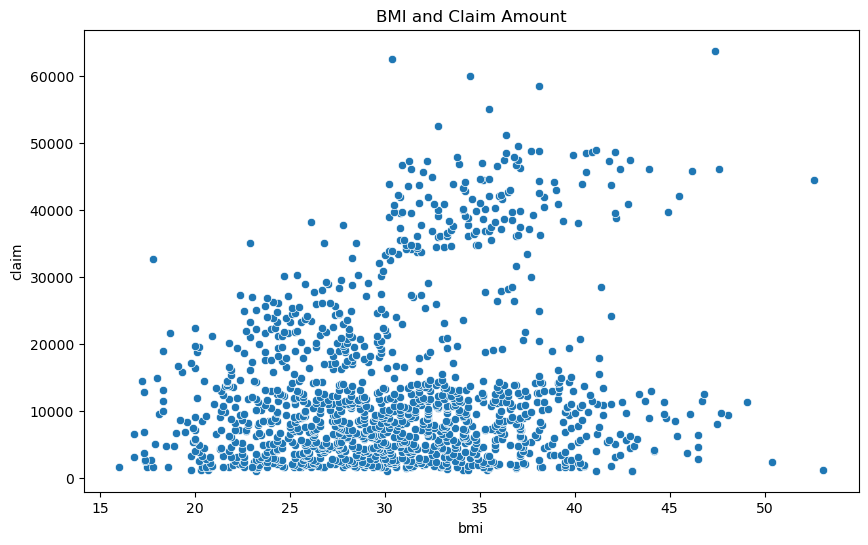

In [28]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))


# Add title
plt.title("BMI and Claim Amount")


sns.scatterplot(x=df['bmi'], y=df['claim'])

Text(0, 0.5, 'Claim Amounts')

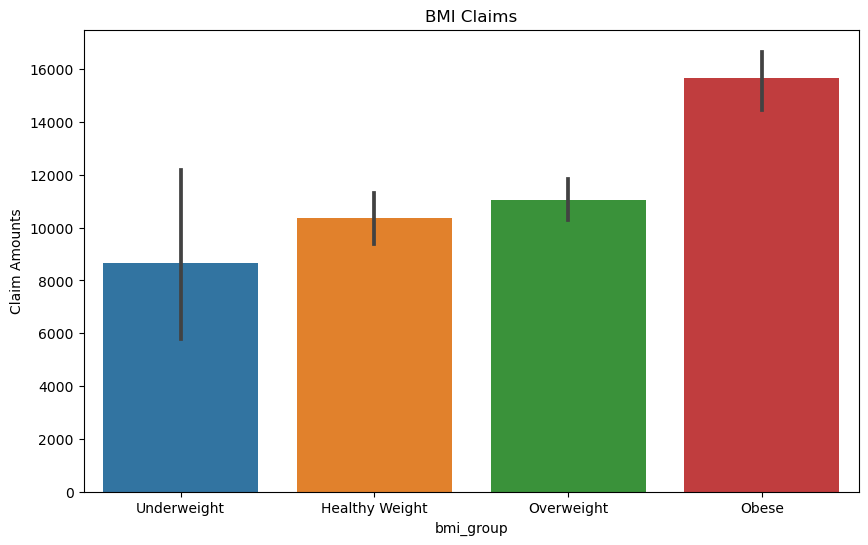

In [29]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("BMI Claims")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=df.bmi_group, y=df['claim'])

# Add label for vertical axis
plt.ylabel("Claim Amounts")

<Axes: title={'center': 'Correlation between Blood Pressure and Generation'}, xlabel='age_group', ylabel='count'>

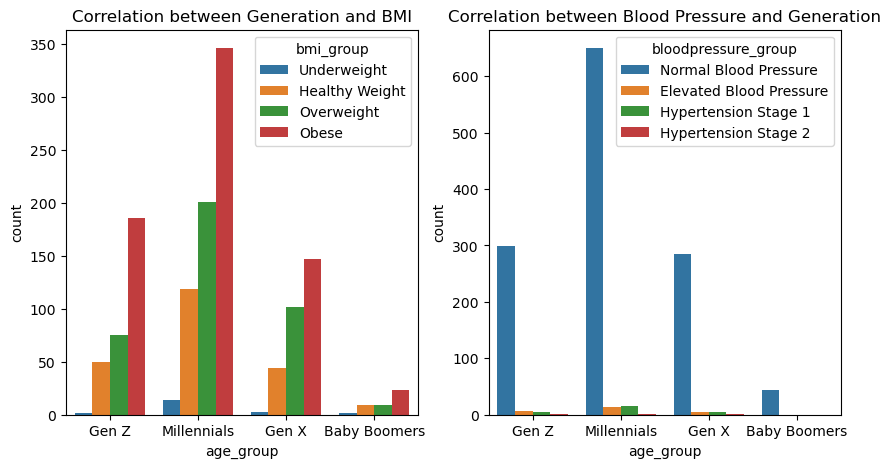

In [30]:
# Sub plot

# plt.subplot(#Total number of rows, total number of columns, plot number)
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)

plt.title("Correlation between Generation and BMI")
sns.countplot(x ='age_group', hue = 'bmi_group', data = df)


plt.subplot(1,2,2)

plt.title("Correlation between Blood Pressure and Generation")
sns.countplot(x = 'age_group', hue = 'bloodpressure_group', data = df)

<Axes: xlabel='age_group', ylabel='count'>

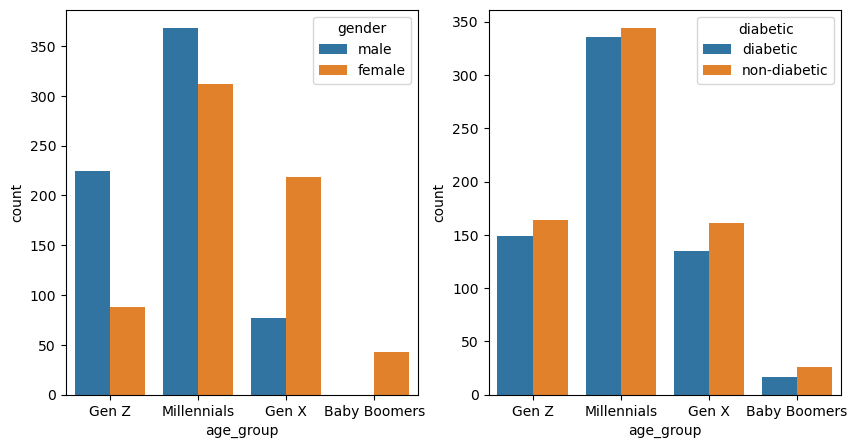

In [31]:
# Sub plot

# plt.subplot(#Total number of rows, total number of columns, plot number)
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot(x = 'age_group', hue = 'gender', data = df)

plt.subplot(1,2,2)
sns.countplot(x ='age_group', hue = 'diabetic', data = df)

<Axes: xlabel='age_group', ylabel='count'>

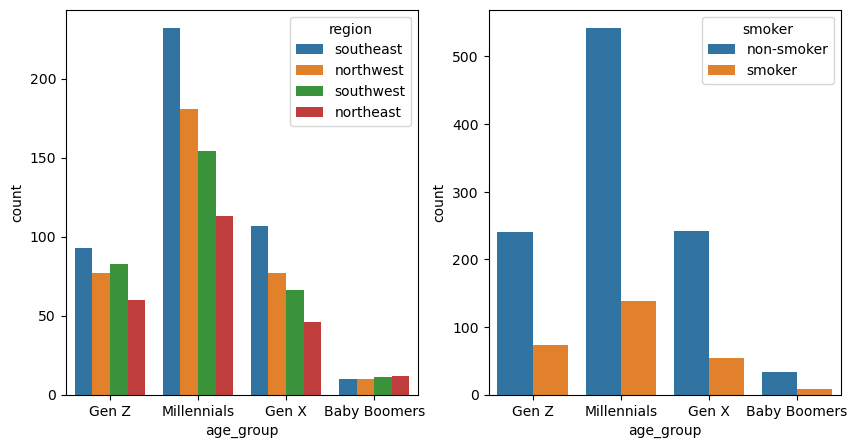

In [32]:
# Sub plot

# plt.subplot(#Total number of rows, total number of columns, plot number)
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot(x = 'age_group', hue = 'region', data = df)

plt.subplot(1,2,2)
sns.countplot( x = 'age_group', hue = 'smoker', data = df)

<Axes: title={'center': 'Correlation of Generations and Children'}, xlabel='age_group', ylabel='count'>

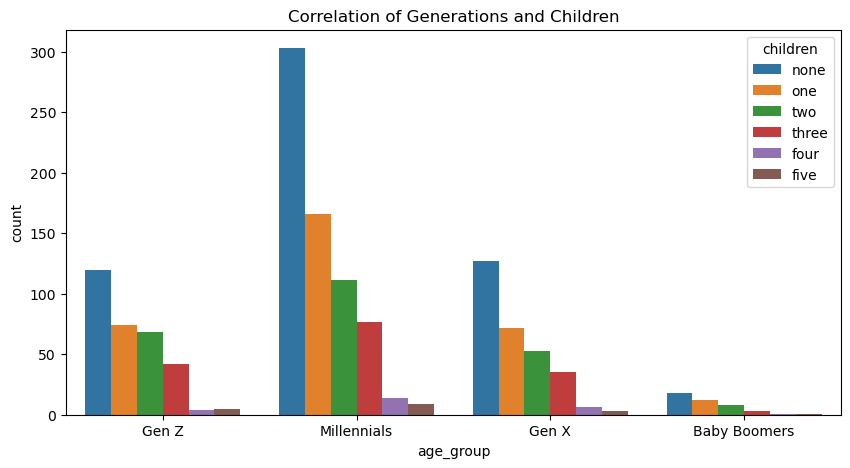

In [33]:
# plt.subplot(#Total number of rows, total number of columns, plot number)
plt.figure(figsize = (10,5))

# Add title 
plt.title("Correlation of Generations and Children")

# Bar chart showing correlation between age groups and generations
sns.countplot( x = 'age_group', hue = 'children', data = df)

Text(0, 0.5, 'Claim Amount')

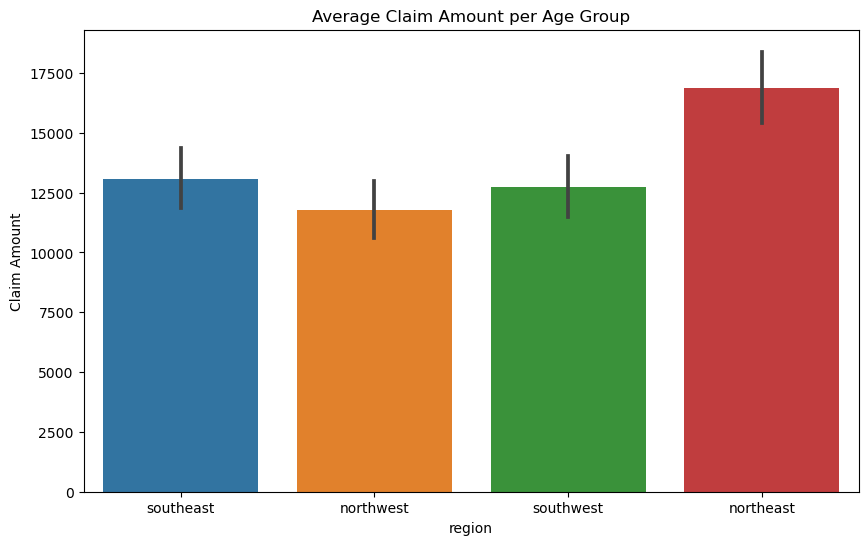

In [34]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Average Claim Amount per Age Group")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=df.region, y=df['claim'])

# Add label for vertical axis
plt.ylabel("Claim Amount")

Text(0, 0.5, 'Region')

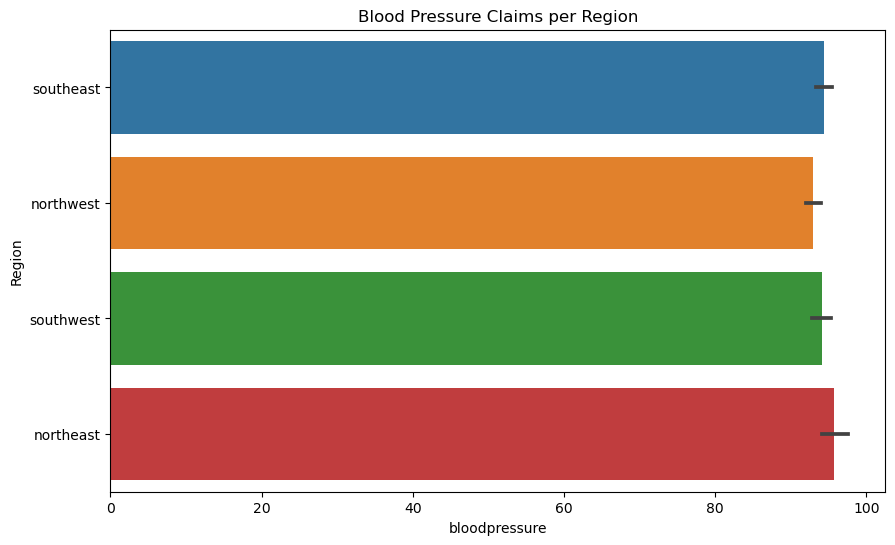

In [38]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Blood Pressure Claims per Region")

# Bar chart showing blood pressure claims by region
sns.barplot(x=df.bloodpressure, y=df['region'])

# Add label for vertical axis
plt.ylabel("Region")

In [40]:
df

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_group,bmi_group,bloodpressure_group
0,39.0,male,23.2,91,diabetic,none,non-smoker,southeast,1121.87,Millennials,Healthy Weight,Normal Blood Pressure
1,24.0,male,30.1,87,non-diabetic,none,non-smoker,southeast,1131.51,Gen Z,Obese,Normal Blood Pressure
7,19.0,male,41.1,100,non-diabetic,none,non-smoker,northwest,1146.80,Gen Z,Obese,Normal Blood Pressure
8,20.0,male,43.0,86,non-diabetic,none,non-smoker,northwest,1149.40,Gen Z,Obese,Normal Blood Pressure
9,30.0,male,53.1,97,non-diabetic,none,non-smoker,northwest,1163.46,Millennials,Obese,Normal Blood Pressure
...,...,...,...,...,...,...,...,...,...,...,...,...
1335,44.0,female,35.5,88,diabetic,none,smoker,northwest,55135.40,Millennials,Obese,Normal Blood Pressure
1336,59.0,female,38.1,120,non-diabetic,one,smoker,northeast,58571.07,Baby Boomers,Obese,Normal Blood Pressure
1337,30.0,male,34.5,91,diabetic,three,smoker,northwest,60021.40,Millennials,Obese,Normal Blood Pressure
1338,37.0,male,30.4,106,non-diabetic,none,smoker,southeast,62592.87,Millennials,Obese,Normal Blood Pressure


In [41]:
df.tail(25)

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_group,bmi_group,bloodpressure_group
1315,23.0,male,35.1,121,non-diabetic,none,smoker,southeast,47055.53,Gen Z,Obese,Elevated Blood Pressure
1316,41.0,male,41.8,109,diabetic,two,smoker,southeast,47269.85,Millennials,Obese,Normal Blood Pressure
1317,49.0,female,31.3,111,non-diabetic,two,smoker,southwest,47291.06,Gen X,Obese,Normal Blood Pressure
1318,27.0,female,32.2,115,diabetic,two,smoker,southwest,47305.31,Gen Z,Obese,Normal Blood Pressure
1319,40.0,male,36.3,94,diabetic,one,smoker,southwest,47403.88,Millennials,Obese,Normal Blood Pressure
1320,19.0,male,42.9,104,diabetic,two,smoker,southeast,47462.89,Gen Z,Obese,Normal Blood Pressure
1321,26.0,male,37.0,81,non-diabetic,two,smoker,northwest,47496.49,Gen Z,Obese,Normal Blood Pressure
1322,33.0,female,36.8,117,diabetic,one,smoker,northeast,47896.79,Millennials,Obese,Normal Blood Pressure
1323,49.0,female,33.8,107,non-diabetic,one,smoker,southwest,47928.03,Gen X,Obese,Normal Blood Pressure
1324,39.0,male,39.9,115,non-diabetic,none,smoker,southwest,48173.36,Millennials,Obese,Normal Blood Pressure
